In [1]:
import os
os.chdir('..')

In [109]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
def plotting_fn(df, env_name, smoothing_factor=0):
    fig, ax = plt.subplots()
    ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    df.ewm(alpha=smoothing_factor).mean().plot(ax=ax)
    ax.set_xlabel("Environment interactions")
    ax.set_ylabel("Avg. reward")
    ax.set_title(env_name);
    fig.savefig(f"figures/reward_{env_name.lower()}.png", dpi=600)

In [64]:
env_name = "Hopper-v2"
root = os.path.join(os.getcwd(), f"KUCodebase\code\\runs")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "reward" in name and "Hopper-v2" in path]

In [65]:
import pandas as pd
df_hopper = pd.concat([pd.read_csv(p, header=None, index_col = 0,names=["it", p.split("runs")[-1].split("\\")[1]], usecols=[0,1]) for p in files], axis=1)

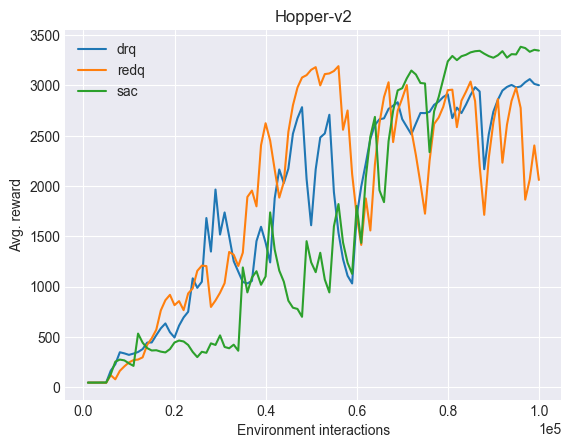

In [110]:
plotting_fn(df_hopper, "Hopper-v2", smoothing_factor=0.4)